In [2]:
import re, os, math, string, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re
%matplotlib inline
# Import Natural Language ToolKit library and download dictionaries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
# Import Scikit-learn helper functions
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# Import Scikit-learn models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
# Import Scikit-learn metric functions
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
# Install dependencies
! pip install nltk sklearn pandas matplotlib seaborn

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


You should consider upgrading via the 'c:\users\asus\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
test_email = """
Re: Apple Sauced...againAt 1:16 AM -0400 on 10/3/02, Gary Lawrence Murphy wrote:
>   "The first question I ask myself when something doesn't seem to be
>   beautiful is why do I think it's not beautiful. And very shortly you
>   discover that there is no reason." -- John Cage

"When I'm working on a problem, I never think about beauty. I think only
how to solve the problem. But when I have finished, if the solution is not
beautiful, I know it is wrong."  -- R. Buckminster Fuller

"Simplicity is the highest goal, achievable when you have overcome all
difficulties." -- Frederic Chopin

"Externalities are the last refuge of the dirigistes." -- Friedrich Hayek
-- 
-----------------
R. A. Hettinga 
The Internet Bearer Underwriting Corporation 
44 Farquhar Street, Boston, MA 02131 USA
"The stoical scheme of supplying our wants by lopping off our
desires is like cutting off our feet when we want shoes."
 -- Jonathan Swift
"""
def keywords(text):
  """Separates feature words from the raw data"""
  # Retrieve a list of punctuation characters, a list of stopwords, and a stemmer function
  punctuation = list(string.punctuation)
  stop_word = nltk.corpus.stopwords.words('english')
  stemmer = nltk.stem.PorterStemmer()
  # Set email body to lowercase, separate words and strip out punctuation
  keyword = nltk.word_tokenize(text.lower())
  keyword = [i.strip(''.join(punctuation)) 
            for i in keyword 
            if i not in punctuation]
  # User Porter Stemmer on each keyword
  keyword = [stemmer.stem(i)
            for i in keyword]
  return [w for w in keyword if w not in stop_word and w != ""]
print(test_email)

# Tokenize test email
print("\n - Keywords from the test email -\n")
keywords_mail = keywords(test_email)
print(keywords_mail)


Re: Apple Sauced...againAt 1:16 AM -0400 on 10/3/02, Gary Lawrence Murphy wrote:
>   "The first question I ask myself when something doesn't seem to be
>   beautiful is why do I think it's not beautiful. And very shortly you
>   discover that there is no reason." -- John Cage

"When I'm working on a problem, I never think about beauty. I think only
how to solve the problem. But when I have finished, if the solution is not
beautiful, I know it is wrong."  -- R. Buckminster Fuller

"Simplicity is the highest goal, achievable when you have overcome all
difficulties." -- Frederic Chopin

"Externalities are the last refuge of the dirigistes." -- Friedrich Hayek
-- 
-----------------
R. A. Hettinga 
The Internet Bearer Underwriting Corporation 
44 Farquhar Street, Boston, MA 02131 USA
"The stoical scheme of supplying our wants by lopping off our
desires is like cutting off our feet when we want shoes."
 -- Jonathan Swift


 - Keywords from the test email -

['appl', 'sauc', 'againat', '1:16

In [4]:
ham_data = len(os.listdir("ham"))
spam_data = len(os.listdir("spam"))
test_data = len(os.listdir("test"))

In [5]:
print("The number of ham_data",ham_data)
print("The number of spam_data",spam_data)
print("The number of test_data",test_data)

The number of ham_data 6031
The number of spam_data 2602
The number of test_data 866


In [6]:
def read_mail(email):
  words = keywords(email)
  # Build table
  table = dict.fromkeys(words, 0)
  for word in words:
    table[word] += 1
  return table
p=0
print("All the words in the email:/n")
test_email_words = read_mail(test_email)
for i in test_email_words.keys():
  print(i)
  p+=1
print("Total number of word in the email: ",p)


All the words in the email:/n
appl
sauc
againat
1:16
0400
10/3/02
gari
lawrenc
murphi
wrote
first
question
ask
someth
doe
n't
seem
beauti
whi
think
veri
shortli
discov
reason
john
cage
work
problem
never
onli
solv
finish
solut
know
wrong
r
buckminst
fuller
simplic
highest
goal
achiev
overcom
difficulti
freder
chopin
extern
last
refug
dirigist
friedrich
hayek
hettinga
internet
bearer
underwrit
corpor
44
farquhar
street
boston
02131
usa
stoical
scheme
suppli
want
lop
desir
like
cut
feet
shoe
jonathan
swift
Total number of word in the email:  75


In [7]:
#initialized our tables:
unique_words_table = set()
spam_table_len = 0
ham_table_len = 0
spam_table = dict()
ham_table = dict()


In [8]:
#define spam and ham learning:
def Spam(email):
  # Include global variables
  global spam_table
  global spam_table_len
  global unique_words_table
  table = read_mail(email)
  word_count=len(table)
  unique_words_table.update(table)

  # Add word count to TOTAL number of Spam words
  spam_table_len += word_count

  # Add word counts to Spam table
  for word in table:
    spam_table.setdefault(word, 0)
    spam_table[word] += table[word]
def Ham(email):
  global ham_table
  global ham_table_len
  global unique_words_table
  table= read_mail(email)
  word_count= len(table)
  unique_words_table.update(table)
  ham_table_len += word_count
  for word in table:
    ham_table.setdefault(word, 0)
    ham_table[word] += table[word]
print("Spam and ham learner is defined")

Spam and ham learner is defined


In [9]:
#Load data
spam_count = 0
ham_count = 0
ham=os.listdir("ham")
spam=os.listdir("spam")

In [14]:
#train our ham and spam data
print("- Training Ham -")
for each in os.listdir('ham'):
  with open('ham/' + each, 'r',encoding='ISO-8859–1') as h:
    Ham(h.read())
  ham_count += 1
print("- Training Spam -")
for each in os.listdir('spam'):
  with open('spam/' + each, 'r',encoding='ISO-8859–1') as s:
    Spam(s.read())
  spam_count += 1

- Training Ham -
- Training Spam -


In [15]:
number=0
print("First 20 element of spam table:\n")
for i in list(spam_table):
  print(spam_table[i],":",i)
  number+=1
  if number>=20:
    break
ham_number=0
print("First 20 element of ham table:\n")
for i in list(ham_table):
  print(ham_table[i],":",i)
  ham_number+=1
  if ham_number>=20:
    break

First 20 element of spam table:

5592 : subject
3 : dobmeo
66 : hgh
648 : energi
384 : level
3939 : ha
87 : gone
3 : stukm
234 : introduc
426 : doctor
66 : formul
387 : human
378 : growth
57 : hormon
2268 : also
1737 : call
546 : refer
723 : medic
216 : scienc
186 : master
First 20 element of ham table:

21984 : subject
84 : christma
162 : tree
45 : farm
336 : pictur
33 : vastar
1068 : resourc
1242 : inc
1857 : gari
3690 : product
846 : high
132 : island
162 : larger
453 : block
9015 : 1
6534 : 2
114 : commenc
390 : saturday
5742 : 00
1833 : p


In [16]:
def predict(email, alpha=1, print_probs=False):
  keyword = keywords(email)
  N = len(unique_words_table)
  spam_priority = spam_count / (spam_count + ham_count)
  ham_priority  =  ham_count / (spam_count + ham_count)
  spam_denom = spam_table_len + N*alpha
  ham_denom = ham_table_len + N*alpha
  spam_num = 1
  ham_num = 1
  for word in keyword:  
    # Set to 0 incase word doesn't exist
    spam_table.setdefault(word, 0)
    ham_table.setdefault(word, 0)
    spam_num *= spam_table[word] + alpha
    ham_num *=  ham_table[word] + alpha
    
  spam_probability = math.log(spam_priority) + (math.log(spam_num) - math.log(spam_denom ** len(keyword)))
  ham_probability  = math.log(ham_priority) + (math.log( ham_num) - math.log( ham_denom ** len(keyword)))
  
  if print_probs == True:
    print("Spam Probability: {}".format(spam_probability))
    print("Ham Probability:  {}".format(ham_probability))
  
  
  # Make classification decision
  if (spam_probability > ham_probability):
    return "spam"
  else:
    return "ham"
  

print("\n### Prediction Function Defined ###\n")


### Prediction Function Defined ###



In [17]:
# Predict our test email
test_email_prediction = predict(test_email, print_probs=True)
print("This email is classified as: ",test_email_prediction)
print("\n")
print(test_email)

Spam Probability: -780.0953869342982
Ham Probability:  -740.3500574546669
This email is classified as:  ham



Re: Apple Sauced...againAt 1:16 AM -0400 on 10/3/02, Gary Lawrence Murphy wrote:
>   "The first question I ask myself when something doesn't seem to be
>   beautiful is why do I think it's not beautiful. And very shortly you
>   discover that there is no reason." -- John Cage

"When I'm working on a problem, I never think about beauty. I think only
how to solve the problem. But when I have finished, if the solution is not
beautiful, I know it is wrong."  -- R. Buckminster Fuller

"Simplicity is the highest goal, achievable when you have overcome all
difficulties." -- Frederic Chopin

"Externalities are the last refuge of the dirigistes." -- Friedrich Hayek
-- 
-----------------
R. A. Hettinga 
The Internet Bearer Underwriting Corporation 
44 Farquhar Street, Boston, MA 02131 USA
"The stoical scheme of supplying our wants by lopping off our
desires is like cutting off our feet 

In [19]:
a_spam_email="""Your latest issue is available NOW! If you do not want issue notifications, click here to unsubscribe.
logo
Hi GEORGE,

Your latest digital issue is available NOW!

Enjoy all the latest from InStyle right on your phone, computer or tablet!

View your library now.

READ NOW
Your digital issue is delivered by emagazines.com. To unsubscribe, go here. Do not reply to this email. For more information, review our Privacy Policy and customer care options visit Customer Support.

Copyright © 2017 - 2019 eMagazines. All Rights Reserved. 230 W Huron St., Ste 500, Chicago, IL 60654
"""
test_email_prediction2 = predict(a_spam_email, print_probs=True)
print("This email is classified as: ",test_email_prediction2)
print("\n")
print(a_spam_email)

Spam Probability: -487.64708079550024
Ham Probability:  -506.61776660899284
This email is classified as:  spam


Your latest issue is available NOW! If you do not want issue notifications, click here to unsubscribe.
logo
Hi GEORGE,

Your latest digital issue is available NOW!

Enjoy all the latest from InStyle right on your phone, computer or tablet!

View your library now.

READ NOW
Your digital issue is delivered by emagazines.com. To unsubscribe, go here. Do not reply to this email. For more information, review our Privacy Policy and customer care options visit Customer Support.

Copyright © 2017 - 2019 eMagazines. All Rights Reserved. 230 W Huron St., Ste 500, Chicago, IL 60654



In [20]:
def confusion_matrix(cmatrix, score):
  # Generate confusion matrix heatmap
  plt.figure(figsize=(6,6))
  sns.heatmap(cmatrix, 
              annot=True, 
              fmt="d", 
              linewidths=.6, 
              square = True, 
              cmap = 'Greens', 
              annot_kws={"size": 18}, 
              xticklabels=['ham email', 'spam email'], 
              yticklabels=['ham email', 'spam email'])

  plt.xticks(rotation='horizontal', fontsize=17)
  plt.yticks(rotation='horizontal', fontsize=17)

  title = 'Accuracy Score: {0:.4f}'.format(score)
  plt.title(title, size = 25);
  plt.show()

In [21]:
def accuracy_model(alpha=1):
  # Initialize confusion matrix (true label vs predicted label)
  spam_spam = 0
  spam_ham  = 0
  ham_ham   = 0
  ham_spam  = 0
  
  
  # Predict testing emails
  print("Predicting Testing Emails..............\n..............")
  for filename in os.listdir('test'):
      with open("test/" + filename, 'r',encoding='ISO-8859–1') as f:
          prediction = predict(f.read())
          true_label = re.split("txt\.", filename)[1]
          
          # Craft confusion matrix counts
          if (true_label == 'ham'):
            if (prediction == 'ham'):
              ham_ham += 1
            else:
              ham_spam += 1
          elif (true_label == 'spam'):
            if (prediction == 'spam'):
              spam_spam += 1
            else:
              spam_ham += 1
              
              
  # Calculate statistics
  cmatrix = [[spam_spam, spam_ham], 
             [ham_spam, ham_ham]]
  correctly_classified = ham_ham + spam_spam
  total_predictions   = ham_ham + spam_spam + ham_spam + spam_ham
  accuracy = float(correctly_classified) / total_predictions

  print("All test Emails: ", total_predictions)
  print("Correctly classified: ", correctly_classified)
  confusion_matrix(cmatrix, accuracy)

Predicting Testing Emails..............
..............
All test Emails:  866
Correctly classified:  824


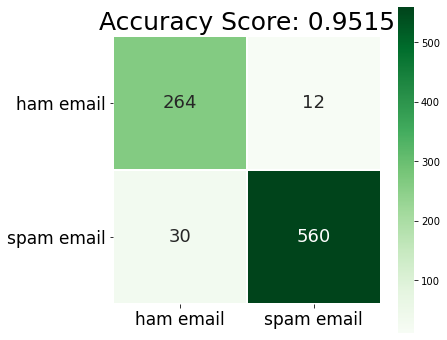

In [22]:
accuracy_model()